In [ ]:
!pip install kaggle

In [ ]:
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# dataset api
!kaggle datasets download -d vaishnaviasonawane/indian-sign-language-dataset

 93% 250M/268M [00:01<00:00, 129MB/s]
100% 268M/268M [00:02<00:00, 137MB/s]


In [ ]:
!ls

indian-sign-language-dataset.zip  kaggle.json  sample_data


In [ ]:
# Extracting the compressed dataset
from zipfile import ZipFile
dataset = '/content/indian-sign-language-dataset.zip'

with ZipFile(dataset, 'r') as zip :
  zip.extractall()
  print("THE DATASET IS EXTRACTED.")

THE DATASET IS EXTRACTED.


In [ ]:
!ls

data  indian-sign-language-dataset.zip	kaggle.json  sample_data


In [ ]:
!ls data

1  3  5  7  9  B  D  F	H  J  L  N  P  R  T  V	X  Z
2  4  6  8  A  C  E  G	I  K  M  O  Q  S  U  W	Y


# **IMPORTING THE DEPENDENCIES**

In [ ]:
import cv2
import os
import random
import tensorflow as tf
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
import keras.utils as image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# Directory containing your subdirectories
base_dir = 'data/'

# List all subdirectories
subdirectories = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

total_images = 0

# Iterate through the subdirectories
for subdirectory_name in subdirectories:
    subdirectory_path = os.path.join(base_dir, subdirectory_name)

    # Count the number of image files in each subdirectory
    image_files = [file for file in os.listdir(subdirectory_path) if os.path.isfile(os.path.join(subdirectory_path, file))]
    total_images += len(image_files)

# Print the total number of images in the dataset
print(f'Total number of images in the dataset: {total_images}')

Total number of images in the dataset: 42000


In [ ]:
class ImageProcessing :

  def __init__(self, base_dir = 'data/') :
    self.base_dir = base_dir

  def list_subdirectories(self) :
    return [d for d in os.listdir(self.base_dir) if os.path.isdir(os.path.join(self.base_dir,d))]

  def display_first_image(self, subdirectory_name) :
    subdirectory_path = os.path.join(self.base_dir, subdirectory_name)
    image_files = [os.path.join(subdirectory_path, file) for file in os.listdir(subdirectory_path) if os.path.isfile(os.path.join(subdirectory_path, file))]


    if image_files :
      first_image_path = image_files[0]
      img = image.load_img(first_image_path)
      img_width, img_height = img.size

      plt.imshow(img)
      plt.title(f"Image Dimensions : {img_width}x{img_height}")
      plt.axis('on')
      plt.show()
    else :
      print("No image files foung in the subdirectory")


  # resizing the image
  def resize_images(self, width=256, height=256):
        datagen = ImageDataGenerator(
            rescale=1./255,
            width_shift_range=0.2,
            height_shift_range=0.2,
            zoom_range=0.2,
            rotation_range=20
        )

        for root, dirs, files in os.walk(self.base_dir):
            for file in files:
                image_path = os.path.join(root, file)
                img = load_img(image_path)
                img = img_to_array(img)
                img = datagen.random_transform(img)
                array_to_img(img).save(image_path)

        print('All images resized.')


  # Edge Detection of Images
  def edge_detection(self) :
    subdirectories = self.list_subdirectories()

    for subdirectory_name in subdirectories :
      subdirectory_path = os.path.join(self.base_dir, subdirectory_name)
      image_files = [os.path.join(subdirectory_path,file) for file in os.listdir(subdirectory_path) if os.path.isfile(os.path.join(subdirectory_path,file))]

      if image_files :
        for image_path in image_files :
          img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
          edges = cv2.Canny(img,100,200)
          edges = cv2.cvtColor(edges,cv2.COLOR_GRAY2BGR)
          cv2.imwrite(image_path,edges)

    print('Edge detection and saving complete')

  # Converting to grayscale
  def convert_to_grayscale(self):

        # Directory containing your subdirectories
    base_dir = 'data/'

    # List all subdirectories
    subdirectories = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

    # Iterate through the subdirectories
    for subdirectory_name in subdirectories:
        # Combine the base directory and subdirectory path
        subdirectory_path = os.path.join(base_dir, subdirectory_name)

        # List all image files in the specified subdirectory
        image_files = [os.path.join(subdirectory_path, file) for file in os.listdir(subdirectory_path) if os.path.isfile(os.path.join(subdirectory_path, file))]

        # Check if there are any image files in the subdirectory
        if image_files:
            print(f"Subdirectory: {subdirectory_name}")

            for image_path in image_files:
                # Load the image using Keras
                img = image.load_img(image_path)

                # Convert the image to grayscale using OpenCV
                img_gray = cv2.cvtColor(image.img_to_array(img), cv2.COLOR_RGB2GRAY)

                # Save the grayscale image back to the original location
                cv2.imwrite(image_path, img_gray)

    print("Grayscale conversion and saving completed.")


  def normalize_images(self) :

    datagen = ImageDataGenerator(rescale=1./255)

    for root, dirs, files in os.walk(self.base_dir) :

      for file in files :

        image_path = os.path.join(root,file)
        img = load_img(image_path)
        img = img_to_array(img)
        img = datagen.standardize(img)

        array_to_img(img).save(image_path)

    print('Image Normalization Complete')



Creating an instance of the 'Image Processing' class and Listing sub directories

In [ ]:
image_processing = ImageProcessing()
subdirectories = image_processing.list_subdirectories()

Display the first image from a subdirectory

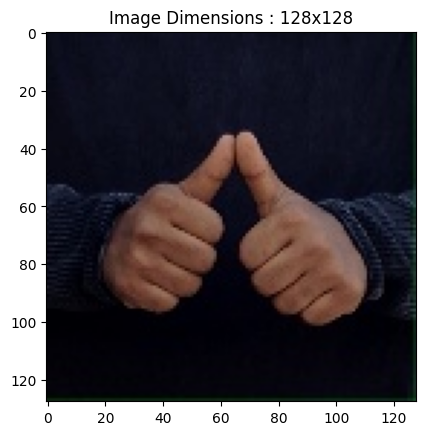

In [ ]:
subdirectory_name = 'A'
image_processing.display_first_image(subdirectory_name)

Resizing all images in the directory

In [ ]:

image_processing.resize_images()

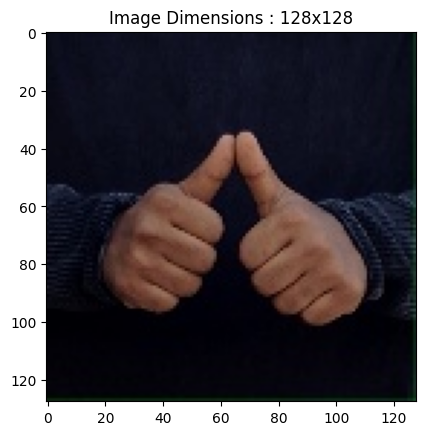

In [ ]:

subdirectory_name = 'A'
image_processing.display_first_image(subdirectory_name)

In [ ]:

# Normalize images
image_processing.normalize_images()

# Display the first image in a specific subdirectory (replace 'A' with the desired subdirectory)
image_processing.display_first_image(subdirectory_name='A')

In [ ]:
image_processing.convert_to_grayscale()

Subdirectory: N
Subdirectory: B
Subdirectory: O
Subdirectory: E
Subdirectory: G
Subdirectory: I
Subdirectory: 2
Subdirectory: P
Subdirectory: 3
Subdirectory: 5
Subdirectory: 1
Subdirectory: W
Subdirectory: 7
Subdirectory: F
Subdirectory: T
Subdirectory: 9
Subdirectory: S
Subdirectory: 8
Subdirectory: M
Subdirectory: U
Subdirectory: A
Subdirectory: Y
Subdirectory: V
Subdirectory: R
Subdirectory: J
Subdirectory: X
Subdirectory: Q
Subdirectory: K
Subdirectory: D
Subdirectory: L
Subdirectory: H
Subdirectory: Z
Subdirectory: 4
Subdirectory: 6
Subdirectory: C
Grayscale conversion and saving completed.


In [ ]:
# Directory containing your subdirectories
base_dir = 'data/'

# List all subdirectories
subdirectories = [d for d in os.listdir(base_dir) if os.path.isdir(os.path.join(base_dir, d))]

# Iterate through the subdirectories
for subdirectory_name in subdirectories:
    # Combine the base directory and subdirectory path
    subdirectory_path = os.path.join(base_dir, subdirectory_name)

    # List all image files in the specified subdirectory
    image_files = [os.path.join(subdirectory_path, file) for file in os.listdir(subdirectory_path) if os.path.isfile(os.path.join(subdirectory_path, file))]

    # Check if there are any image files in the subdirectory
    if image_files:
        print(f"Subdirectory: {subdirectory_name}")

        for image_path in image_files:
            # Load the image using Keras
            img = image.load_img(image_path)

            # Convert the image to grayscale using OpenCV
            img_gray = cv2.cvtColor(image.img_to_array(img), cv2.COLOR_RGB2GRAY)

            # Save the grayscale image back to the original location
            cv2.imwrite(image_path, img_gray)

print("Grayscale conversion and saving completed.")

Subdirectory: N
Subdirectory: B
Subdirectory: O
Subdirectory: E
Subdirectory: G
Subdirectory: I
Subdirectory: 2
Subdirectory: P
Subdirectory: 3
Subdirectory: 5
Subdirectory: 1
Subdirectory: W
Subdirectory: 7
Subdirectory: F
Subdirectory: T
Subdirectory: 9
Subdirectory: S
Subdirectory: 8
Subdirectory: M
Subdirectory: U
Subdirectory: A
Subdirectory: Y
Subdirectory: V
Subdirectory: R
Subdirectory: J
Subdirectory: X
Subdirectory: Q
Subdirectory: K
Subdirectory: D
Subdirectory: L
Subdirectory: H
Subdirectory: Z
Subdirectory: 4
Subdirectory: 6
Subdirectory: C
Grayscale conversion and saving completed.


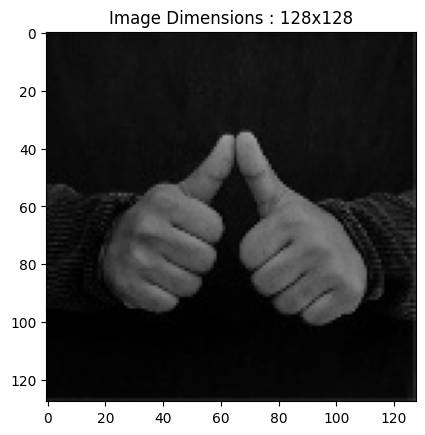

In [ ]:
subdirectory_name = 'A'
image_processing.display_first_image(subdirectory_name)

In [ ]:

# Detect edges and highlight features in images
image_processing.edge_detection()


Edge detection and saving complete


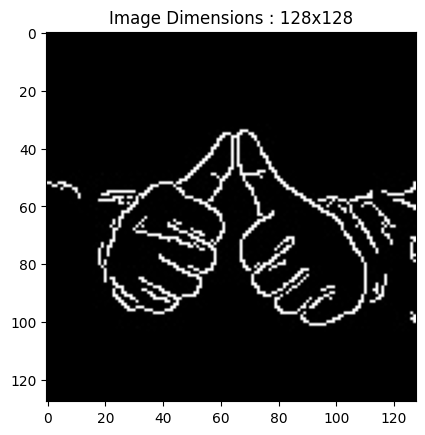

In [ ]:
# Display the first image in a specific subdirectory (replace 'A' with the desired subdirectory)
image_processing.display_first_image(subdirectory_name='A')

In [ ]:
base_dir = 'data/'

# Create empty lists to store file paths and labels
data = []
labels =[]


# Iterate through the subdirectories
for subdirectory_name in os.listdir(base_dir) :

  subdirectory_path = os.path.join(base_dir, subdirectory_name)

  image_files = [os.path.join(subdirectory_path, file) for file in os.listdir(subdirectory_path) if os.path.isfile(os.path.join(subdirectory_path, file))]

  # Append files paths and labels to the lists
  data.extend(image_files)
  labels.extend([subdirectory_name] * len(image_files))

In [ ]:
class DisplayImage_with_Label :

  def __init__(self,base_dir ='data/') :
    self.base_dir = base_dir

  def display_image_with_label(self,subdirectory_name) :

    subdirectory_path = os.path.join(self.base_dir, subdirectory_name)

    image_files = [os.path.join(subdirectory_path,file) for file in os.listdir(subdirectory_path) if os.path.isfile(os.path.join(subdirectory_path,file))]

    if image_files :

      first_image_path = image_files[0]

      img = image.load_img(first_image_path)

      img_array = image.img_to_array(img)


      # Display the image
      plt.imshow(img_array/255.0)

      plt.title(f"Label: {subdirectory_name}")

      plt.axis('off')

      plt.show()

    else :
      print('No image found in this directory')

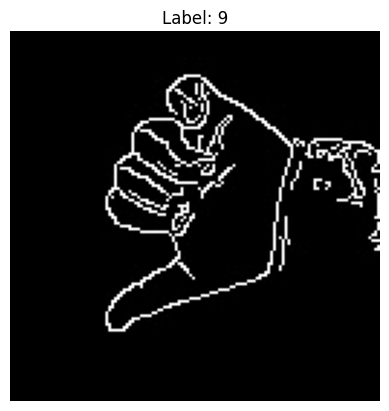

In [ ]:
display_img_label = DisplayImage_with_Label()

display_img_label.display_image_with_label('9')

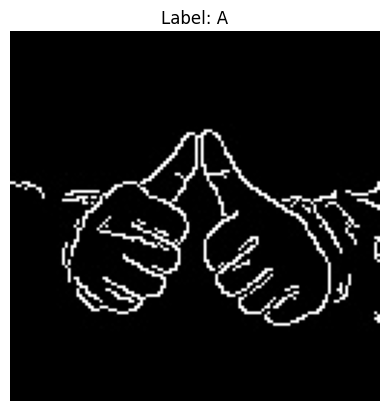

In [ ]:
class DisplayImage_with_Label:

    def __init__(self, base_dir='data/'):
        self.base_dir = base_dir

    def display_image_with_label(self, subdirectory_name):
        subdirectory_path = os.path.join(self.base_dir, subdirectory_name)

        image_files = [os.path.join(subdirectory_path, file) for file in os.listdir(subdirectory_path)
                       if os.path.isfile(os.path.join(subdirectory_path, file))]

        if image_files:
            first_image_path = image_files[0]
            img = image.load_img(first_image_path)
            img_array = image.img_to_array(img)

            # Display the image
            plt.imshow(img_array / 255.0)
            plt.title(f"Label: {subdirectory_name}")
            plt.axis('off')
            plt.show()
        else:
            print(f'No image found in the directory: {subdirectory_name}')


# Create an instance of DisplayImage_with_Label
display_img_label = DisplayImage_with_Label()

# Specify the subdirectory you want to display (replace 'A' with the desired subdirectory)
subdirectory_name_to_display = 'A'

# Display the first image with label for the specified subdirectory
display_img_label.display_image_with_label(subdirectory_name_to_display)


In [ ]:
# Detect edges and highlight features in images
image_processing.edge_detection()

Edge detection and saving complete
